## Dataset Creation (1 Marks)
- Generate a synthetic dataset for binary classification using the make_blobs
function from the scikit-learn library.
- The dataset should have 1000 samples, 2 features, and their respective binary
labels.
- Split the dataset into train and test sets.
- Plot the training data using matplotlib.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

2025-01-24 05:53:44.534227: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-24 05:53:45.836229: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-24 05:53:46.951691: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737698027.813803   29841 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737698028.046977   29841 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-24 05:53:50.496236: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D, InputLayer
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

In [5]:
def create_dataset():
    X, y = make_blobs(n_samples=1000, centers=2, n_features=2,cluster_std=1)
    ## train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
    ## Data viz
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
    plt.xlabel('Col 1')
    plt.ylabel('Col 2')
    plt.grid()
    plt.show()
    return X_train, X_test, y_train, y_test

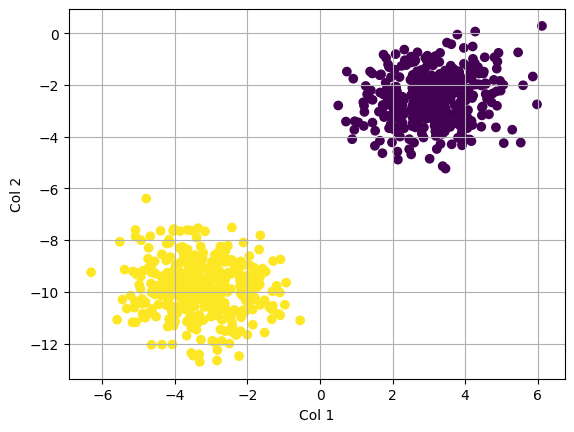

In [6]:
X_train, X_test, y_train, y_test = create_dataset()

## Implement Backpropagation (4 Mark)
- Create a small neural network from scratch with the following specifications:
    - Input layer with 2 neurons.
    - One hidden layer with 4 neurons using the sigmoid activation function.
    - Output layer with 1 neuron using the sigmoid activation function.
- Implement forward and backward propagation manually to train the network.
- Update the weights using gradient descent.
- Evaluate the model on the test set and print its accuracy.


In [7]:
y_train = y_train.reshape(-1, 1)
ip_layer = 2
hidden_layer = 4
op_layer = 1

# Weights and biases
w_ih = np.random.rand(ip_layer, hidden_layer) * 0.1
b_ih = np.zeros((1, hidden_layer))
w_ho = np.random.rand(hidden_layer, op_layer) * 0.1
b_ho = np.zeros((1, op_layer))

learning_rate = 0.01
epochs = 1000
print(w_ih)
print(b_ih)
print(w_ho)
print(b_ho)

[[0.09164845 0.09219269 0.08028643 0.07849032]
 [0.06045481 0.02253475 0.07551192 0.02912065]]
[[0. 0. 0. 0.]]
[[0.08862428]
 [0.09102953]
 [0.04517169]
 [0.0584505 ]]
[[0.]]


In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
    
for epoch in range(epochs):
    ## Fwd propagation 
    z_ih = np.dot(X_train, w_ih) + b_ih
    a_ih = sigmoid(z_ih)
    z_op = np.dot(a_ih, w_ho) + b_ho
    a_op = sigmoid(z_op)
    ## Loss Fn
    loss = -np.mean(y_train * np.log(a_op) + (1 - y_train) * np.log(1 - a_op)) ## diff btwn true labels and predicted labels(binary cross-entropy loss)
   
    # back propagation
    error_output = a_op - y_train
    d_sigm_op = a_op * (1 - a_op)
    d_err_op = error_output * d_sigm_op
    d_w_ho = np.dot(a_ih.T, d_err_op) ## deriv of wts btwn hidden-op layer{d(out_er)/d(out_h)}
    d_b_ho = np.sum(error_output, axis=0) ## deriv of biases to op layer
    
    d_sigm = a_ih * (1 - a_ih) ## deriv of sigmoid fn at hidden layer
    error_hidden = np.dot(error_output, w_ho.T) * d_sigm ## err going back to hidden layr{d(out_h)/d(net)}
    d_w_ih = np.dot(X_train.T, error_hidden) ## deriv of wts btwn ip-hidden layer 
    d_b_ih = np.sum(error_hidden, axis=0) ## deriv of biases to hidden layer
    
    # Updating wts & bias
    w_ho -= learning_rate * d_w_ho
    b_ho -= learning_rate * d_b_ho
    w_ih -= learning_rate * d_w_ih
    b_ih -= learning_rate * d_b_ih
    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

Epoch 0, Loss: 0.7085571548540607
Epoch 50, Loss: 0.039035886062574444
Epoch 100, Loss: 0.026844257352124253
Epoch 150, Loss: 0.021658472478755585
Epoch 200, Loss: 0.018624685822511738
Epoch 250, Loss: 0.01657741955783926
Epoch 300, Loss: 0.015077890733181235
Epoch 350, Loss: 0.013919326713163736
Epoch 400, Loss: 0.012989857453251534
Epoch 450, Loss: 0.01222299244198228
Epoch 500, Loss: 0.011576415559111077
Epoch 550, Loss: 0.01102175346095905
Epoch 600, Loss: 0.010539181125330956
Epoch 650, Loss: 0.01011437557548326
Epoch 700, Loss: 0.009736698489499247
Epoch 750, Loss: 0.009398061981709045
Epoch 800, Loss: 0.009092193558332368
Epoch 850, Loss: 0.008814144261602503
Epoch 900, Loss: 0.008559950345505118
Epoch 950, Loss: 0.008326394908964245


In [9]:
## Final wts and Biases
print(w_ih)
print(b_ih)
print(w_ho)
print(b_ho)

[[-3.51038378 -3.06303402  2.91038336 -3.45208581]
 [-0.16827824 -0.18309604  0.17853309 -0.16396568]]
[[-0.87785384 -0.9206709   0.86705576 -0.84143355]]
[[ 2.4468961 ]
 [ 2.65603612]
 [-2.33255056]
 [ 2.21225686]]
[[-2.46923163]]


In [10]:
z_ih_test = np.dot(X_test, w_ih) + b_ih
a_ih_test = sigmoid(z_ih_test)
z_ho_test = np.dot(a_ih_test, w_ho) + b_ho
a_op_test = sigmoid(z_ho_test)

# OP Prob() -> binary predicn
y_pred = (a_op_test > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for Test Data: {accuracy*100} %")

Accuracy for Test Data: 100.0 %


## Decision Boundary Visualization (1 Marks)
- Plot the decision boundary of the trained model using the training dataset.

In [11]:
def predict(X):
    z_ih = np.dot(X, w_ih) + b_ih
    a_ih = sigmoid(z_ih)
    z_ho = np.dot(a_ih, w_ho) + b_ho
    a_ho = sigmoid(z_ho)  
    return a_ho

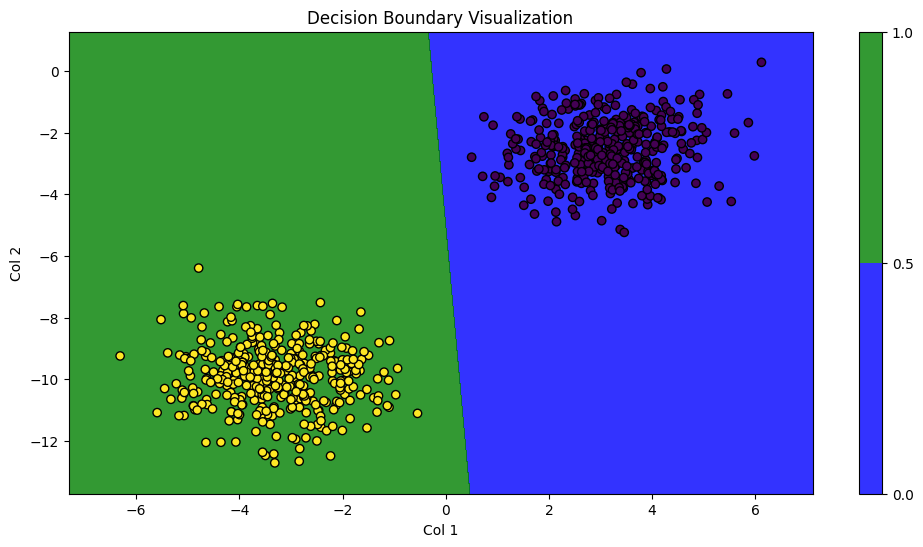

In [12]:
import numpy as np
import matplotlib.pyplot as plt

## grid setup
x_min,x_max = X_train[:,0].min()-1,X_train[:,0].max()+1
y_min,y_max = X_train[:,1].min()-1,X_train[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))

# flatten grid pts
grid_points = np.c_[xx.ravel(), yy.ravel()]
y_prd_prob = predict(grid_points) #predict
y_prd_prob = y_prd_prob.reshape(xx.shape)

# decision boundary
plt.figure(figsize=(12,6))
plt.contourf(xx, yy, y_prd_prob, levels=[0,0.5,1], alpha=0.8,colors=["blue", "green"])
plt.colorbar()

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolor='k')
plt.title("Decision Boundary Visualization")
plt.xlabel("Col 1")
plt.ylabel("Col 2")
plt.show()

## Dataset Preparation
- Use the MNIST dataset for this task (refer to TensorFlow documentation for
loading the dataset).
    - Split the dataset into train, validation, and test sets.
      
## Model Creation and Training (2 Marks)
- Create a neural network using TensorFlow for multiclass classification. The
    model should include:
- Input layer matching the dataset features.
- At least two hidden layers with a customizable number of neurons.
- An output layer with softmax activation (the number of neurons should equal the number of classes).
- Experiment with the following:
    - Regularization techniques: L1, L2, and Dropout.
    - Optimizers: SGD, Adam, and RMSprop.
    - With and without Batch Normalization.
## Model Evaluation and Hyperparameter Optimization (2 Mark)
- Train the model and evaluate it on the test set using accuracy, loss, and a
    confusion matrix.
- Identify the optimal combination of:
    - Regularization technique.
    - Optimizer.
    - Batch Normalization usage.
- Justify your findings based on the results obtained.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# x_train[0]
# pixel data normalization
x_train = x_train / 255.0
x_test = x_test / 255.0
# x_train[0]

In [5]:
## train-val split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# One-hot encoding labels
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(f"Training set: {x_train.shape} \nValidation set: {x_val.shape} \nTest set: {x_test.shape}")

Training set: (48000, 28, 28) 
Validation set: (12000, 28, 28) 
Test set: (10000, 28, 28)


In [6]:
def set_nn(regularization, dropout_rate, batch_norm, optimizer):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1))) ##ip layer
    model.add(Dense(128, activation='relu', kernel_regularizer=regularization))  ##1st hidden layer
    if batch_norm:
        model.add(BatchNormalization())
    if dropout_rate:
        model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularization))  ## 2nd hidden layer
    if batch_norm:
        model.add(BatchNormalization())
    if dropout_rate:
        model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax')) ##op layer
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [7]:
import keras_tuner as kt
def hyperparam_testing(prm):
    optimizer = prm.Choice('optimizer', ['adam', 'sgd', 'rmsprop'])
    dropout_rate = prm.Float('dropout_rate', 0.0, 0.6, step=0.1)
    regularization_option = prm.Choice('regularization', ['none', 'l1', 'l2'])
    batch_norm = prm.Boolean('batch_norm')
    if regularization_option == 'l1':
        regularization = l1(0.001)
    elif regularization_option == 'l2':
        regularization = l2(0.001)
    else:
        regularization = None
    return set_nn(regularization, dropout_rate, batch_norm, optimizer)

tuner = kt.RandomSearch(
    hyperparam_testing,
    objective='val_accuracy',
    max_trials=7,
    executions_per_trial=1,
    overwrite=True,
    directory='mnist_tune',
    project_name='mnist_multiclasstune')

tuner.search(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)
best_param = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_param)   

Trial 7 Complete [00h 00m 36s]
val_accuracy: 0.9263333082199097

Best val_accuracy So Far: 0.9536666870117188
Total elapsed time: 00h 06m 03s


In [8]:
# Print Combination
print("Best combination of hyperparameters are:")
print(f"Optimizer: {best_param.get('optimizer')}")
print(f"Dropout Rate: {best_param.get('dropout_rate')}")
print(f"Regularization: {best_param.get('regularization')}")
print(f"Batch Normalization: {best_param.get('batch_norm')}")

Best combination of hyperparameters are:
Optimizer: adam
Dropout Rate: 0.1
Regularization: l1
Batch Normalization: False


In [9]:
train_log =  best_model.fit(x_train, y_train, epochs=25,  validation_data=(x_val, y_val), batch_size=128)

Epoch 1/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7478 - loss: 3.0769 - val_accuracy: 0.9054 - val_loss: 0.9838
Epoch 2/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8896 - loss: 0.9817 - val_accuracy: 0.9227 - val_loss: 0.7574
Epoch 3/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9055 - loss: 0.7847 - val_accuracy: 0.9327 - val_loss: 0.6428
Epoch 4/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9130 - loss: 0.6836 - val_accuracy: 0.9363 - val_loss: 0.5836
Epoch 5/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9215 - loss: 0.6249 - val_accuracy: 0.9427 - val_loss: 0.5324
Epoch 6/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9209 - loss: 0.5929 - val_accuracy: 0.9427 - val_loss: 0.5115
Epoch 7/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9279 - loss: 0.5629 - val_accuracy: 0.9458 - val_loss: 0.4947
Epoch 8/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9274 - loss: 0.5451 - val_accuracy: 0.

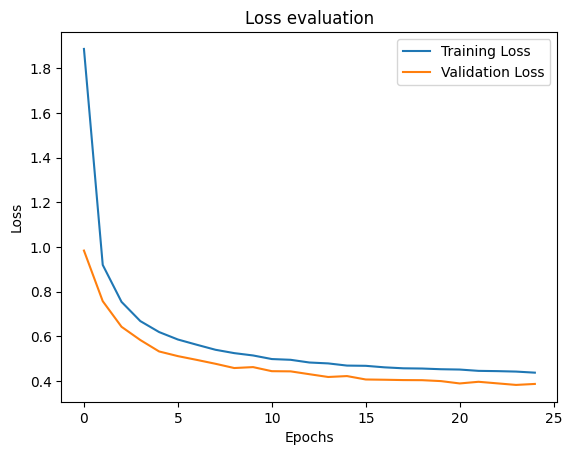

In [10]:
plt.plot(train_log.history['loss'], label='Training Loss')
plt.plot(train_log.history['val_loss'], label='Validation Loss')
plt.title('Loss evaluation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Test Accuracy: 0.9623000025749207
Confusion Matrix:


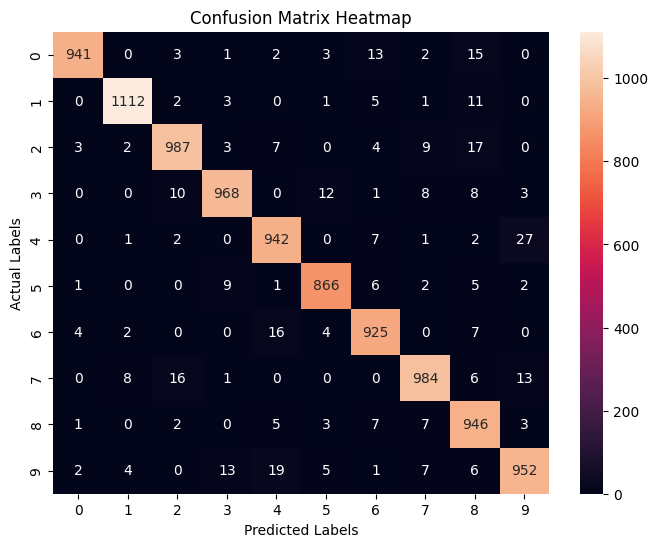

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.97      0.96      0.96      1032
           3       0.97      0.96      0.96      1010
           4       0.95      0.96      0.95       982
           5       0.97      0.97      0.97       892
           6       0.95      0.97      0.96       958
           7       0.96      0.96      0.96      1028
           8       0.92      0.97      0.95       974
           9       0.95      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [62]:
test_loss, test_accuracy = best_model.evaluate(x_test, y_test, verbose=0)

# testing results
predictions = np.argmax(best_model.predict(x_test), axis=1)
true_labels = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(true_labels, predictions)

lb=[i for i in range(10)]
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=lb, yticklabels=lb)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()
print("Classification Report:")
print(classification_report(true_labels, predictions))

## OBSERVATIONS/ REPORT

- Best combination of hyperparameters are sgd Optimizer, 0.3 Dropout Rate, L1 Regularization with Batch Normalization
- Hyperparameters explanation:-
    - Adam optimizer: data is not clean, and requires complex optimizers
    - L1 regularisation: this indicates that the model can work with regularizing some weights to 0, indicating that the training data might have some redundant features in it
    - Drop out rate 0.1: low dropout rate(<0.5) indicates that the model can't generalise easily with less complex model and needs most of it's nodes to predict well and prevent overfitting. This could be due to the small training dataset size.
    - Batch Normalisation(True): indicates that the dataset or model is sensitive to initialization related issues(as training data had been normalised), and normalizing activations helps stabilize training data.
- __Loss Evaluation:__ From the loss function graph above we can see that -
    - validation loss closely follows the training loss, meaning the model's generalization capability is good.
    -  the low gap between the training and testing loss means that model deosn't overfit/underfit.
    -  the decreasing loss with epochs indicates that the model is successful in learning.